In [63]:
import kaggle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

from xgboost import XGBRegressor

In [64]:
kaggle.api.authenticate()

In [65]:
#kaggle.api.dataset_download_files('jessevent/all-crypto-currencies', path='./data', unzip=True)
kaggle.api.dataset_download_files('shenba/time-series-datasets', path='./data', unzip=True)

In [66]:
df = pd.read_csv('./data/Electric_Production.csv', index_col='DATE', parse_dates=True)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [67]:
df.shape

(397, 1)

In [68]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [69]:
df.columns = ['consumo']
df.head()

,consumo
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [70]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

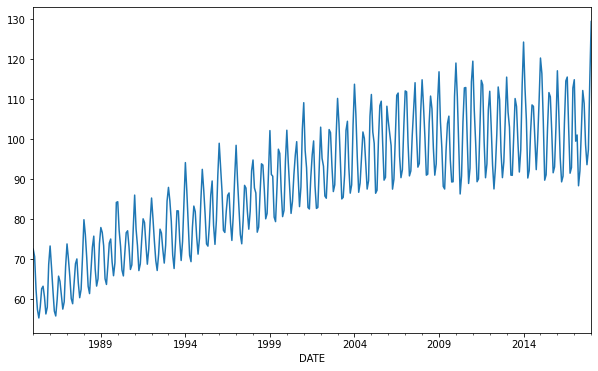

In [71]:
df['consumo'].plot(figsize=(10,6));

#1 Prevendo com Arima

<Figure size 576x432 with 0 Axes>

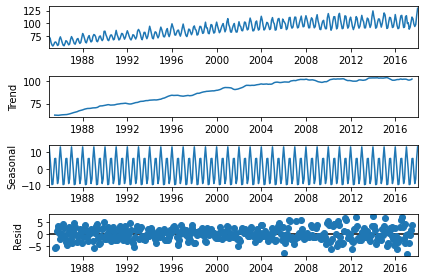

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(df)

fig = plt.figure(figsize=(8,6))
fig = resultado.plot()

#1 Teste de estacionariedade

In [73]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['consumo'].dropna())
print(f'teste ADF: {result[0]}')
print(f'p-valor: {result[1]}')

teste ADF: -2.25699035004725
p-valor: 0.18621469116586592


In [74]:
#diff () Calculates the difference of a dataframe element
# compared with another element in the dataframe (defaltis element in previous row)

result = adfuller(df['consumo'].diff().dropna())
print(f'Teste ADF: {result[0]}')
print(f'p-valor: {result[1]}')

Teste ADF: -7.104890882267314
p-valor: 4.0777865655393805e-10


In [75]:
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True,
                            m=6,
                            D=1,
                            start_P=1,
                            start_Q=1,
                            max_P=2,
                            max_Q=2,
                            information_criterion='aic',
                            trace=True,
                            error_action='ignore',
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1912.925, Time=1.00 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2404.500, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=1998.731, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2057.803, Time=0.70 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2000.250, Time=1.13 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=1.11 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1880.044, Time=1.85 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.91 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=inf, Time=3.34 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=inf, Time=2.08 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=1925.181, Time=0.61 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=1942.791, Time=0.67 sec
 ARIMA(2,1,1)(2,1,1)[6]             : AIC=1881.313, Time=1.17 sec
 ARIMA(1,1,2)(2,1,1)[6]             : AIC=1880.682, Time=0.95 sec
 ARIMA(0,1,0)(2,1,1)[6]             : AIC=1955.485, T

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(df, order=(2,1,2), seasonal_order=(1,1,2,6))
resultado_sarimax = model.fit()

c:\Users\Automacao\Documents\project\ambev\meta5\meta5Venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\Automacao\Documents\project\ambev\meta5\meta5Venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\Automacao\Documents\project\ambev\meta5\meta5Venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Automacao\Documents\project\ambev\meta5\meta5Venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting par

In [77]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           consumo   No. Observations:                  397
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -899.089
Date:                           Tue, 18 Jan 2022   AIC                           1814.177
Time:                                   14:34:34   BIC                           1845.907
Sample:                               01-01-1985   HQIC                          1826.755
                                    - 01-01-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0873      0.350     -0.249      0.803      -0.773       0.599
ar.L2          0.2828      0.214      1.321      0.187      -0.137       0.702
ma.L1         -0.2982      0.337     -0.884      0.377      -0.959       0.363
ma.L2         -0.6397      0.329     -1.944      0.052      -1.285       0.005
ar.S.L6       -0.9976      0.003   -380.237      0.000      -1.003      -0.992
ma.S.L6        0.1145      0.040      2.832      0.005       0.035       0.194
ma.S.L12      -0.7764      0.037    -20.853      0.000      -0.849      -0.703
sigma2         5.5549      0.307     18.092      0.000       4.953       6.157
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                42.27
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
predicoes = resultado_sarimax.get_prediction(start=-12)
predicao_media = predicoes.predicted_mean

In [79]:
# intervalo de confianca

intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(103.05573378020092, 112.29470656617762)

In [80]:
predicao_media[0]

107.67522017318927

In [81]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

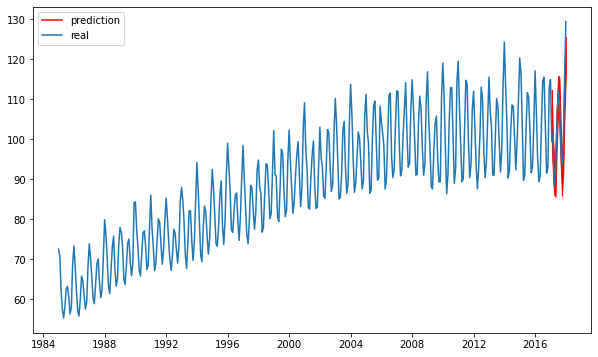

In [82]:
plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values, color='red',label='prediction')
plt.fill_between(datas_previsao,limites_abaixo,limites_acima, color='pink')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_sarima = sqrt(mean_squared_error(df[-12:].values, predicao_media.values))
print(rmse_sarima)

4.193245187059947


#1 Forecast com Arima

In [84]:
#Forecast pra 12 values

forecast = resultado_sarimax.get_forecast(steps=12)
forecast_medio = forecast.predicted_mean
forecast_medio.size

12

In [85]:
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalo_abaixo_f[0], intervalo_acima_f[0]

(109.93675644258403, 119.1756911353564)

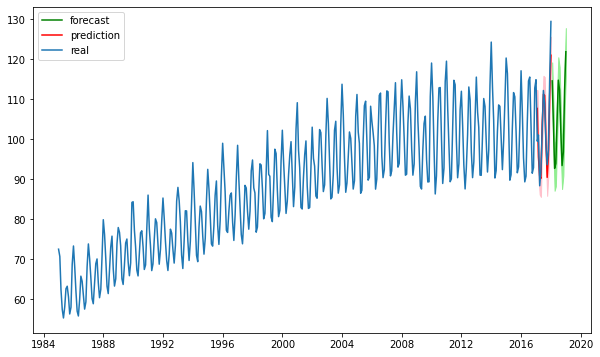

In [86]:
datas_forecast = np.asarray(forecast_medio.index)
pred_dates = np.asarray(predicao_media.index)
dates = np.asarray(df.index)

plt.figure(figsize=(10,6))
plt.plot(datas_forecast,forecast_medio.values, color='green',label='forecast')
plt.fill_between(datas_forecast,intervalo_abaixo_f,intervalo_acima_f, color='lightgreen')

plt.plot(datas_previsao,predicao_media.values, color='red',label='prediction')
plt.fill_between(datas_previsao,limites_abaixo,limites_acima, color='pink')

plt.plot(datas, df.values, label='real')
plt.legend(loc='upper left')
plt.show()

#1 Prevendo com XGBoost

In [87]:
df

,consumo
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [88]:
treino = df.loc[df.index <= '2016-12-31']
validacao = df.loc[df.index > '2016-12-31']

treino.shape, validacao.shape

((384, 1), (13, 1))

In [89]:
treino.index.min(), treino.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2016-12-01 00:00:00'))

In [90]:
validacao.index.min(), validacao.index.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

#1 Criando a variavel target e a lagged variable

In [91]:
treino['consumo']

DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2016-08-01    115.5159
2016-09-01    102.7637
2016-10-01     91.4867
2016-11-01     92.8900
2016-12-01    112.7694
Name: consumo, Length: 384, dtype: float64

In [92]:
treino['consumo'].shift(-1)

DATE
1985-01-01     70.6720
1985-02-01     62.4502
1985-03-01     57.4714
1985-04-01     55.3151
1985-05-01     58.0904
                ...   
2016-08-01    102.7637
2016-09-01     91.4867
2016-10-01     92.8900
2016-11-01    112.7694
2016-12-01         NaN
Name: consumo, Length: 384, dtype: float64

In [93]:
treino['target'] = treino['consumo'].shift(-1)
treino.head()

C:\Users\AUTOMA~1\AppData\Local\Temp/ipykernel_19044/2376029834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino['target'] = treino['consumo'].shift(-1)


,consumo,target
DATE,,
1985-01-01,72.5052,70.6720
1985-02-01,70.6720,62.4502
1985-03-01,62.4502,57.4714
1985-04-01,57.4714,55.3151
1985-05-01,55.3151,58.0904


In [94]:
treino.tail()

,consumo,target
DATE,,
2016-08-01,115.5159,102.7637
2016-09-01,102.7637,91.4867
2016-10-01,91.4867,92.8900
2016-11-01,92.8900,112.7694
2016-12-01,112.7694,NaN


In [95]:
treino = treino.dropna()
treino.tail()

,consumo,target
DATE,,
2016-07-01,114.5397,115.5159
2016-08-01,115.5159,102.7637
2016-09-01,102.7637,91.4867
2016-10-01,91.4867,92.8900
2016-11-01,92.8900,112.7694


In [96]:
validacao['target'] = validacao['consumo'].shift(-1)
validacao.head()

C:\Users\AUTOMA~1\AppData\Local\Temp/ipykernel_19044/4242353932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao['target'] = validacao['consumo'].shift(-1)


,consumo,target
DATE,,
2017-01-01,114.8505,99.4901
2017-02-01,99.4901,101.0396
2017-03-01,101.0396,88.3530
2017-04-01,88.3530,92.0805
2017-05-01,92.0805,102.1532


In [97]:
validacao.tail()

,consumo,target
DATE,,
2017-09-01,98.6154,93.6137
2017-10-01,93.6137,97.3359
2017-11-01,97.3359,114.7212
2017-12-01,114.7212,129.4048
2018-01-01,129.4048,NaN


In [98]:
validacao = validacao.dropna()
validacao.tail()

,consumo,target
DATE,,
2017-08-01,108.9312,98.6154
2017-09-01,98.6154,93.6137
2017-10-01,93.6137,97.3359
2017-11-01,97.3359,114.7212
2017-12-01,114.7212,129.4048


In [99]:
x_treino = treino.loc[:,['consumo']].values
y_treino = treino.loc[:,['target']].values
x_validacao = validacao.loc[:,['consumo']].values
y_validacao = validacao.loc[:,['target']].values

x_treino.shape, y_treino.shape, x_validacao.shape, y_validacao.shape


((383, 1), (383, 1), (12, 1), (12, 1))

In [100]:
modelo_xg = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
modelo_xg.fit(x_treino,y_treino)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [101]:
validacao.iloc[0]

consumo    114.8505
target      99.4901
Name: 2017-01-01 00:00:00, dtype: float64

In [102]:
predicao = modelo_xg.predict(x_validacao[0])
predicao

array([108.23493], dtype=float32)